In [1]:
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

sns.set_style('white')

In [5]:
df = pd.read_csv("/Users/Jenny/Documents/Thinkful/random downloaded data/crime.csv", skiprows=[0,1,2,3], skipfooter=3)

C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0,NaN
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0,NaN
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0,NaN
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN
5,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN,NaN
6,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0.0,NaN
7,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3.0,NaN
8,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1.0,NaN
9,Amsterdam,"18,182",30,0,NaN,0,12,18,405,99,291,15,0.0,NaN


## Data cleaning

In [8]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [11]:
#rename the columns
df.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape_rev', 'Rape_leg', 
              'Robbery', 'AggAssault', 'PropertyCrime', 'Burglary', 'Theft', 'MVTheft', 
              'Arson', 'Unnamed']

#convert vars to numeric; need to remove commas first
df.Population = df['Population'].str.replace(',', '')
df.ViolentCrime = df['ViolentCrime'].str.replace(',', '')
#df.Murder = df['Murder'].str.replace(',', '')
#df.Rape_rev = df['Rape_rev'].str.replace(',', '')
df.Rape_leg = df['Rape_leg'].str.replace(',', '')
df.Robbery = df['Robbery'].str.replace(',', '')
df.AggAssault = df['AggAssault'].str.replace(',', '')
df.PropertyCrime = df['PropertyCrime'].str.replace(',', '')
df.Burglary = df['Burglary'].str.replace(',', '')
df.Theft = df['Theft'].str.replace(',', '')
df.MVTheft = df['MVTheft'].str.replace(',', '')
#df.Arson = df['Arson'].str.replace(',', '')

df.Population = pd.to_numeric(df.Population)
df.Robbery = pd.to_numeric(df.Robbery)
df.Murder = pd.to_numeric(df.Murder)
df.PropertyCrime = pd.to_numeric(df.PropertyCrime)
df.ViolentCrime = pd.to_numeric(df.ViolentCrime)
df.Rape_leg = pd.to_numeric(df.Rape_leg)
df.AggAssault = pd.to_numeric(df.AggAssault)
df.Burglary = pd.to_numeric(df.Burglary)
df.Theft = pd.to_numeric(df.Theft)
df.MVTheft = pd.to_numeric(df.MVTheft)

#verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
City             348 non-null object
Population       348 non-null int64
ViolentCrime     348 non-null int64
Murder           348 non-null int64
Rape_rev         0 non-null float64
Rape_leg         348 non-null int64
Robbery          348 non-null int64
AggAssault       348 non-null int64
PropertyCrime    348 non-null int64
Burglary         348 non-null int64
Theft            348 non-null int64
MVTheft          348 non-null int64
Arson            187 non-null float64
Unnamed          0 non-null float64
dtypes: float64(3), int64(10), object(1)
memory usage: 38.1+ KB


In [13]:
df.corr()

,Population,ViolentCrime,Murder,Rape_rev,Rape_leg,Robbery,AggAssault,PropertyCrime,Burglary,Theft,MVTheft,Arson,Unnamed
Population,1.000000,0.998854,0.986758,NaN,0.990839,0.998469,0.999134,0.996265,0.970578,0.997946,0.992421,0.701761,NaN
ViolentCrime,0.998854,1.000000,0.992098,NaN,0.994985,0.999923,0.999942,0.998059,0.978150,0.998762,0.996271,0.917793,NaN
Murder,0.986758,0.992098,1.000000,NaN,0.997746,0.993104,0.990843,0.995403,0.993733,0.993175,0.997992,0.963200,NaN
Rape_rev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rape_leg,0.990839,0.994985,0.997746,NaN,1.000000,0.995438,0.994140,0.997843,0.992442,0.996260,0.998764,0.926301,NaN
Robbery,0.998469,0.999923,0.993104,NaN,0.995438,1.000000,0.999742,0.998237,0.979525,0.998735,0.996927,0.931607,NaN
AggAssault,0.999134,0.999942,0.990843,NaN,0.994140,0.999742,1.000000,0.997622,0.976288,0.998561,0.995403,0.888278,NaN
PropertyCrime,0.996265,0.998059,0.995403,NaN,0.997843,0.998237,0.997622,1.000000,0.987137,0.999666,0.998302,0.920765,NaN
Burglary,0.970578,0.978150,0.993733,NaN,0.992442,0.979525,0.976288,0.987137,1.000000,0.982700,0.991464,0.952121,NaN
Theft,0.997946,0.998762,0.993175,NaN,0.996260,0.998735,0.998561,0.999666,0.982700,1.000000,0.996878,0.893610,NaN


In [18]:
df_num = pd.concat([df.Population, df.ViolentCrime, df.Murder, df.Rape_leg, df.Robbery,
                   df.AggAssault, df.PropertyCrime, df.Burglary, df.Theft, df.MVTheft], axis=1)

df_num.corr()


,Population,ViolentCrime,Murder,Rape_leg,Robbery,AggAssault,PropertyCrime,Burglary,Theft,MVTheft
Population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.996265,0.970578,0.997946,0.992421
ViolentCrime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.998059,0.978150,0.998762,0.996271
Murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.995403,0.993733,0.993175,0.997992
Rape_leg,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.997843,0.992442,0.996260,0.998764
Robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.998237,0.979525,0.998735,0.996927
AggAssault,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.997622,0.976288,0.998561,0.995403
PropertyCrime,0.996265,0.998059,0.995403,0.997843,0.998237,0.997622,1.000000,0.987137,0.999666,0.998302
Burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,0.987137,1.000000,0.982700,0.991464
Theft,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.999666,0.982700,1.000000,0.996878
MVTheft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.998302,0.991464,0.996878,1.000000


Note that several variables correlate nearly perfectly. This seems suspect. Possibly due to outliers elsewhere

In [28]:
df['PropertyCrime'].describe()

count       348.000000
mean        792.606322
std        7659.724746
min           0.000000
25%          40.500000
50%         112.500000
75%         341.000000
max      141971.000000
Name: PropertyCrime, dtype: float64

In [29]:
df['Murder'].describe()

count    348.000000
mean       1.566092
std       18.303673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      335.000000
Name: Murder, dtype: float64

## Feature Engineering

In [34]:
features = pd.DataFrame()

features['property_crime_rate'] = df.PropertyCrime/df.Population
features['population'] = df.Population
features['population_squared'] = df.Population**2
features['murder_rate'] = df.Murder/df.Population
features['robbery_rate'] = df.Robbery/df.Population

features.head(20)

,property_crime_rate,population,population_squared,murder_rate,robbery_rate
0,0.006448,1861,3463321,0.000000,0.000000
1,0.009313,2577,6640929,0.000000,0.000000
2,0.005622,2846,8099716,0.000000,0.000000
3,0.041753,97956,9595377936,0.000082,0.002317
4,0.034909,6388,40806544,0.000000,0.000626
5,0.011250,4089,16719921,0.000000,0.000734
6,0.005615,1781,3171961,0.000000,0.000000
7,0.017904,118296,13993943616,0.000008,0.000262
8,0.022061,9519,90611361,0.000000,0.000420
9,0.022275,18182,330585124,0.000000,0.000660



Coefficients: 
 [[  1.04446469e-07  -1.24530073e-14   6.26896474e-17   1.73924852e-15]]

Intercept: 
 [ 0.01783407]

R-squared:
0.0360515709043


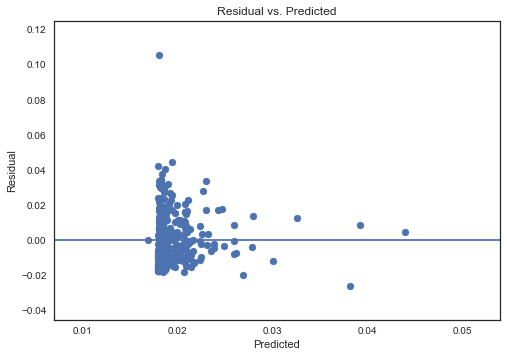

In [37]:
#instantiate & fit our modeal
regr = linear_model.LinearRegression()
Y = features['property_crime_rate'].values.reshape(-1, 1)
X = features[['population', 'population_squared', 'murder_rate','robbery_rate']]
regr.fit(X, Y)

#check results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

#check multivariate non-normality and heteroscedasticity, extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['property_crime_rate']

#calc. resid.
residual = actual - predicted

# Scatter predicted vs. residual
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

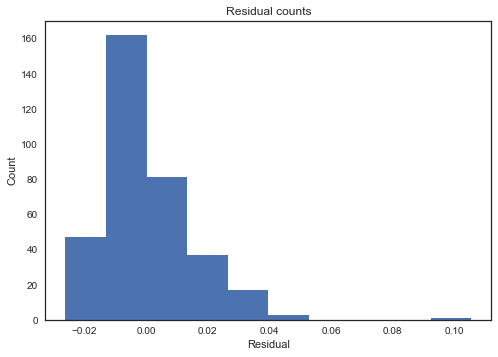

In [38]:
#look at dist. of resid.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()